In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D,Dropout,Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
import matplotlib.pyplot as plt
import pickle
import PIL
from PIL import Image
from math import exp,tanh
from tokenize import Exponent
from enum import Enum
from io import BytesIO,StringIO
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
import base64
import pandas as pd
import seaborn as sns
import uuid


<ipython-input-2-47cee7d27fc1>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


# New Section

In [ ]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
183,11.41,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.02361,0.1167,0.06217,...,12.37,17.70,79.12,467.2,0.11210,0.1610,0.1648,0.06296,0.1811,0.07427
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.10890,0.2649,0.3779,0.09594,0.2471,0.07463
156,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,0.06166,...,20.47,25.11,132.90,1302.0,0.14180,0.3498,0.3583,0.15150,0.2463,0.07738
208,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,0.07310,...,14.55,29.16,99.48,639.3,0.13490,0.4402,0.3162,0.11260,0.4128,0.10760
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [ ]:
 y_train.head()

,0
183,1
448,1
156,0
208,1
287,1


In [ ]:
def  plot_to_str():
    img = BytesIO()
    plt.savefig(img,format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

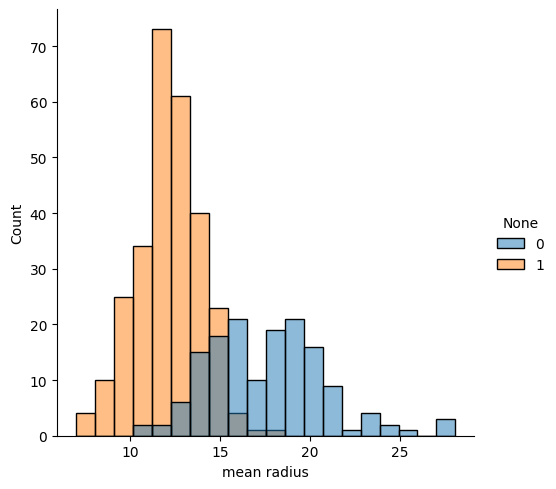

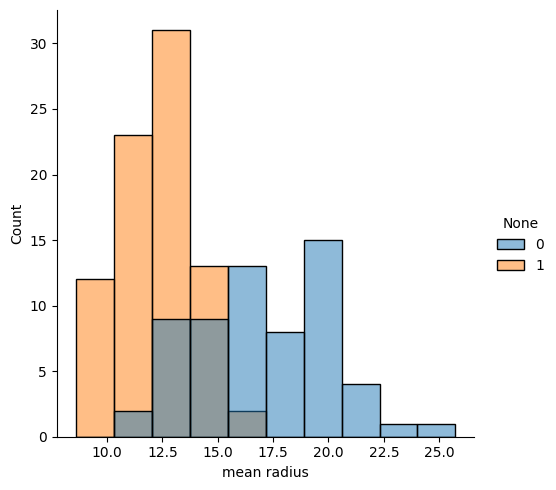

In [ ]:
sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

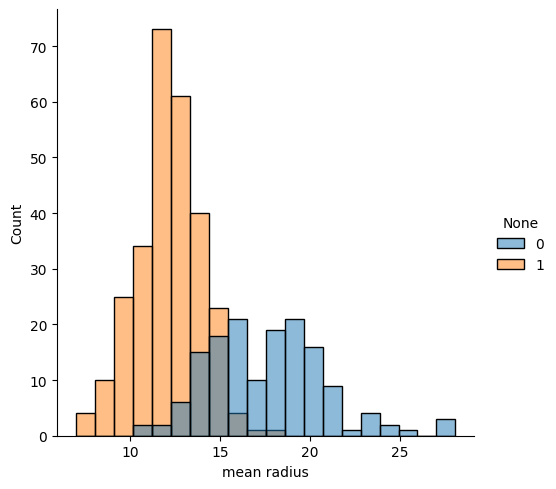

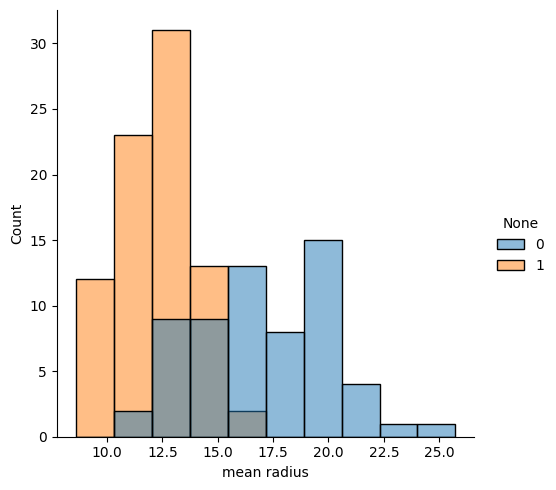

In [ ]:
sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_train = plot_to_str()

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

In [ ]:
clf = GradientBoostingClassifier().fit(X_train, y_train)

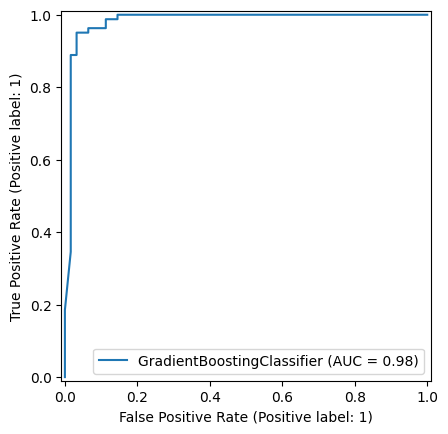

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)#plot_roc_curve(clf, x_text, y_test)
roc_curve = plot_to_str()
plt.show()

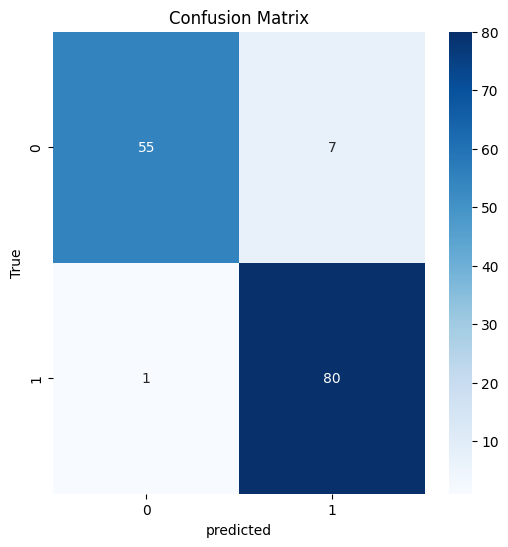

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
DATADIR = "/content/drive/MyDrive/BC/breast cancer images/10254"

In [ ]:
 file_name ="/content/drive/MyDrive/BC/archive (11).zip"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
CATEGORIES = ['benign','malignent']

In [ ]:
import pathlib
data_dir = pathlib.Path(DATADIR)
image_count = len(list(data_dir.rglob('*.png')))
print(image_count)

858


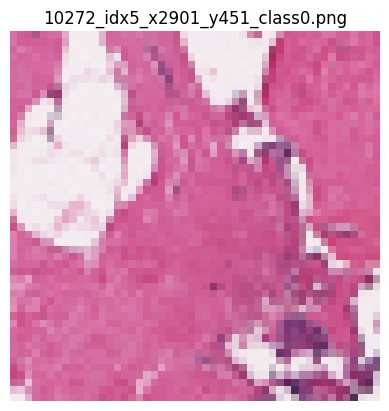

In [ ]:
folder_path = 'drive/MyDrive/BC/breast cancer images/10272/0'
for file_name in os.listdir(folder_path):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        file_path = os.path.join(folder_path, file_name)
        img = Image.open(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file_name)
        plt.show()
        break

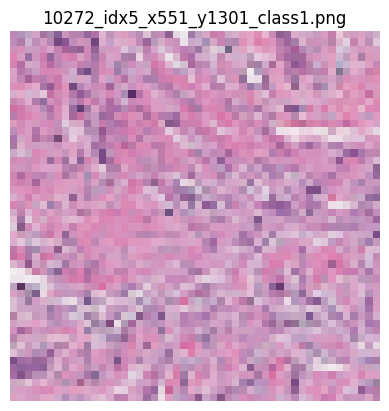

In [ ]:
folder_path = 'drive/MyDrive/BC/breast cancer images/10272/1'
for file_name in os.listdir(folder_path):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        file_path = os.path.join(folder_path, file_name)
        img = Image.open(file_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file_name)
        plt.show()
        break

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 858 files belonging to 2 classes.
Using 687 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 858 files belonging to 2 classes.
Using 171 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1']


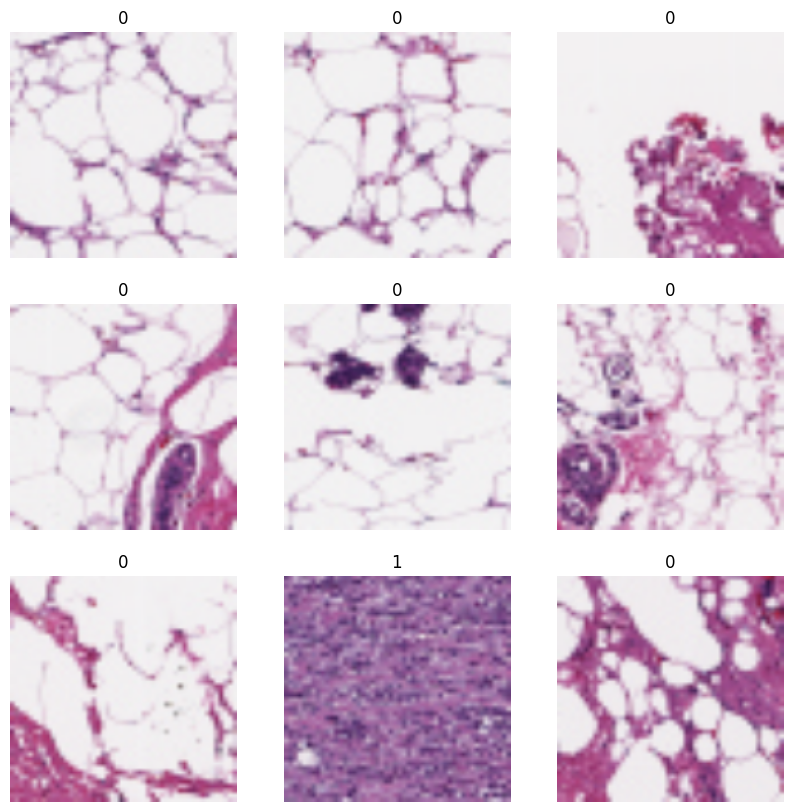

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(10, 10))

# Take one batch from the dataset
for images, labels in train_ds.take(1):
    for i in range(9):  # Show the first 8 images
        ax = plt.subplot(3, 3, i + 1)  # 3x3 grid to display images
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert image to uint8 for displaying
        plt.title(class_names[labels[i].numpy()])  # Get class name from labels
        plt.axis("off")  # Turn off axis

plt.show()


In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [ ]:
import tensorflow as tf
import numpy as np
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.21531385 0.96740204


In [ ]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#model.compile(optimizer='adam', loss='your_loss_function', metrics=['your_metrics'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7709 - loss: 0.5407 - val_accuracy: 0.9123 - val_loss: 0.2761
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9113 - loss: 0.2338 - val_accuracy: 0.9123 - val_loss: 0.1852
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 988ms/step - accuracy: 0.9156 - loss: 0.1803 - val_accuracy: 0.9123 - val_loss: 0.2712
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9314 - loss: 0.2144 - val_accuracy: 0.9474 - val_loss: 0.1336
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 956ms/step - accuracy: 0.9618 - loss: 0.1155 - val_accuracy: 0.9532 - val_loss: 0.1410
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9682 - loss: 0.0974 - val_accuracy: 0.9474 - val_loss: 0.1191
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9795 - loss: 0.0727 - val_accuracy: 0.9298 - val_loss: 0.1745
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 965ms/step - accuracy: 0.9643 - loss: 0.1097 - val_accuracy: 0.9474 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.9512 - loss: 0.1667
Validation Accuracy: 95.32%
Validation Loss: 0.16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       156
           1       0.82      0.60      0.69        15

    accuracy                           0.95       171
   macro avg       0.89      0.79      0.83       171
weighted avg       0.95      0.95      0.95       171



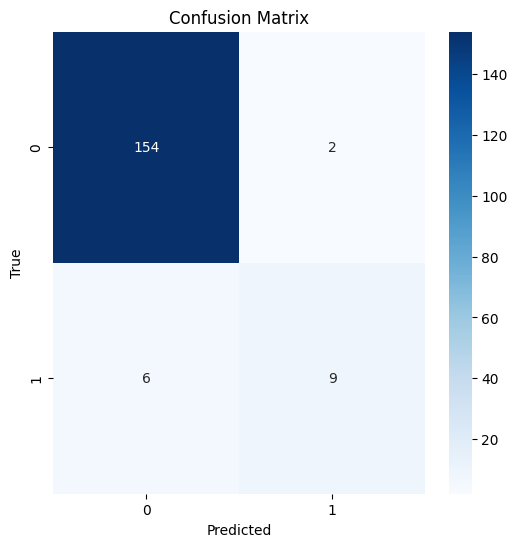

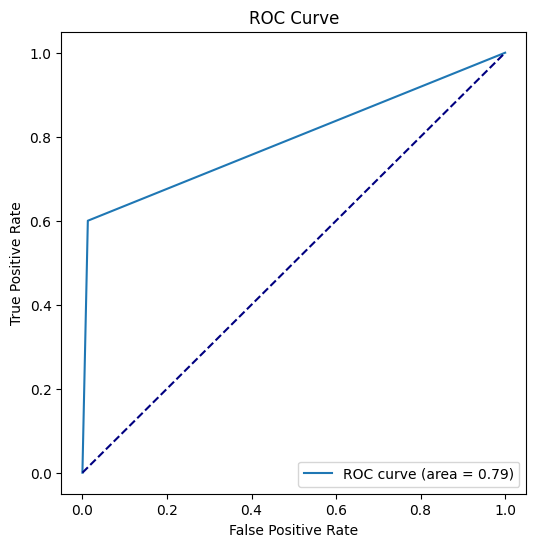

In [ ]:
# Add this import statement at the beginning of the cell:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.2f}")

# Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_class = np.argmax(predictions, axis=-1)
    y_pred.extend(predicted_class)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (For binary classification)
if num_classes == 2:
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0,1], [0,1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

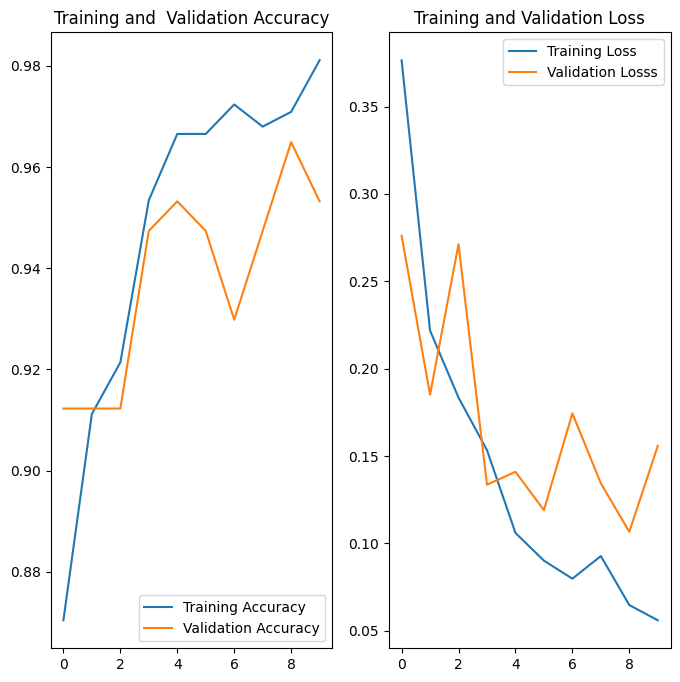

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and  Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Losss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


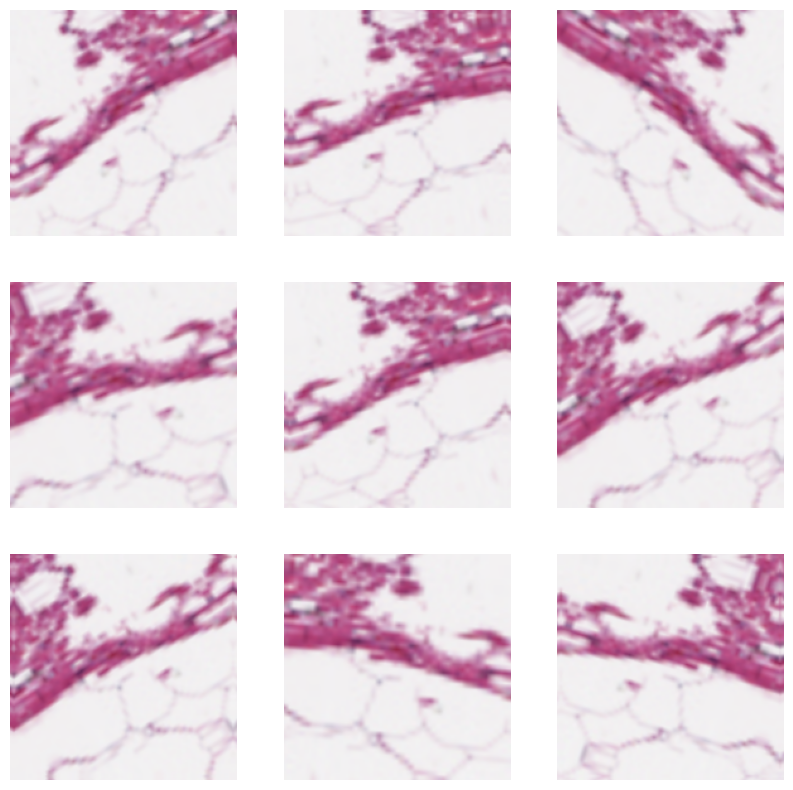

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
from keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)



Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8522 - loss: 0.6076 - val_accuracy: 0.9006 - val_loss: 0.1768
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9431 - loss: 0.1562 - val_accuracy: 0.9474 - val_loss: 0.1521
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9554 - loss: 0.1313 - val_accuracy: 0.9591 - val_loss: 0.1515
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9551 - loss: 0.1446 - val_accuracy: 0.9474 - val_loss: 0.1546
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9498 - loss: 0.1452 - val_accuracy: 0.9532 - val_loss: 0.1473
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9575 - loss: 0.1419 - val_accuracy: 0.9415 - val_loss: 0.2313
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9584 - loss: 0.1213 - val_accuracy: 0.9474 - val_loss: 0.1525
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9683 - loss: 0.1307 - val_accuracy: 0.9474 - val_loss:

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.9460 - loss: 0.1780
Validation Accuracy (with augmentation): 94.74%
Validation Loss (with augmentation): 0.15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Classification Report (with augmentation):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       156
           1       0.80      0.53      0.64        15

    accuracy                           0.95       171
   macro avg       0.88      0.76      0.81       171
weighted avg       0.94      0.95      0.94       171



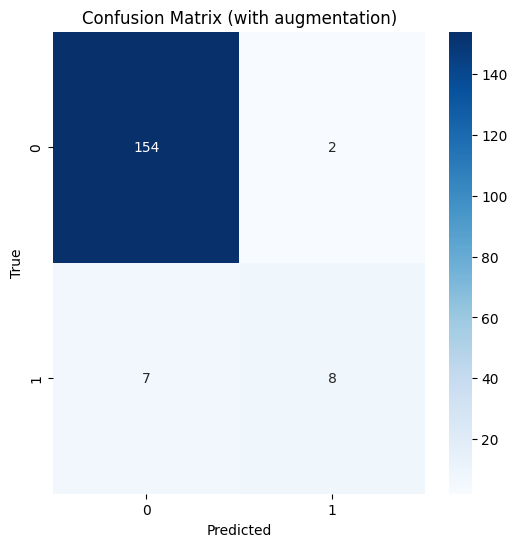

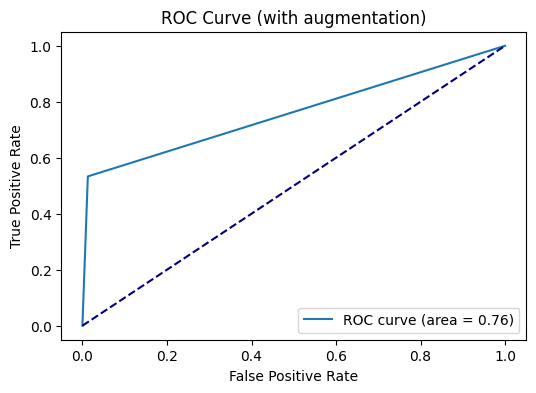

In [ ]:
# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy (with augmentation): {val_accuracy * 100:.2f}%")
print(f"Validation Loss (with augmentation): {val_loss:.2f}")

# Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_class = np.argmax(predictions, axis=-1)
    y_pred.extend(predicted_class)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification Report
print("Classification Report (with augmentation):")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (with augmentation)')
plt.show()

# ROC Curve (For binary classification)
if num_classes == 2:
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (with augmentation)')
    plt.legend(loc='lower right')
    plt.show()


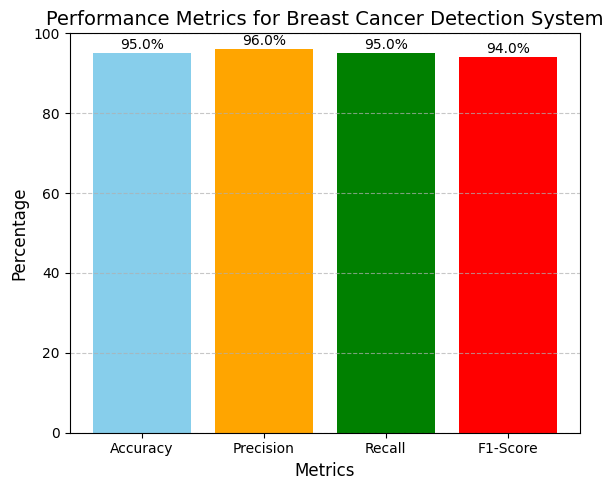

In [ ]:
import matplotlib.pyplot as plt

# Metrics values (replace with your actual values)
accuracy = 95
precision = 96
recall = 95
f1_score = 94

# Labels and data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

# Create the bar chart
plt.figure(figsize=(6, 5))
colors = ['skyblue', 'orange', 'green', 'red']
plt.bar(metrics, values, color=colors)

# Add labels and title
plt.ylim(0, 100)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Performance Metrics for Breast Cancer Detection System', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

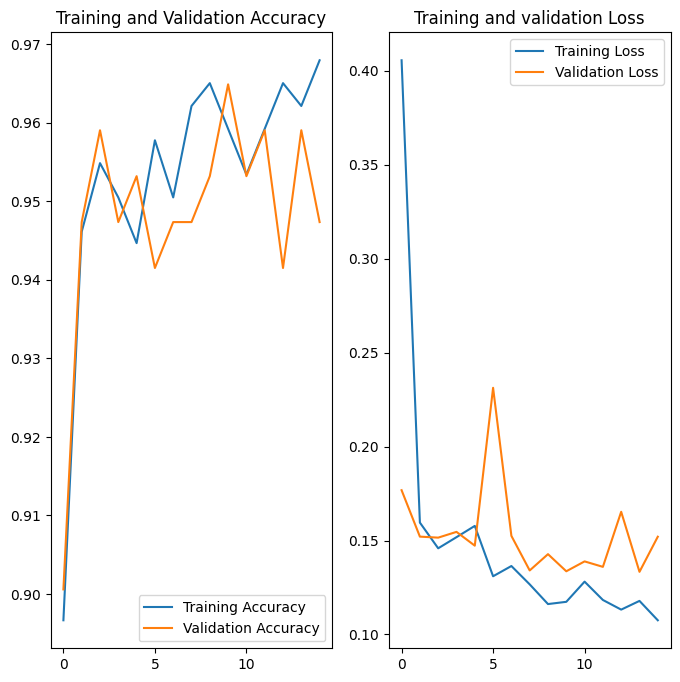

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Use the actual number of epochs recorded in the history
epochs_range = range(len(acc))  # Adjust to len(loss), len(val_acc), or len(val_loss) if they differ

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# Corrected the typo in variable name 'epocchs_range' to 'epochs_range'
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation Loss')
plt.show()

In [ ]:
DATADIR = "/content/drive/MyDrive/BC/breast cancer images/10269/0/10269_idx5_x1001_y1001_class0.png"

In [ ]:
data_dir = pathlib.Path(DATADIR)

In [ ]:
import tensorflow as tf
import numpy as np

# Load a single image
img = tf.keras.utils.load_img(
    data_dir, target_size=(img_height, img_width)  # Resize image
)
img_array = tf.keras.utils.img_to_array(img)  # Convert image to array
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Make predictions
try:
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])  # Convert logits to probabilities

    print(
        "This image most likely belongs to '{}' with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
except Exception as e:
    print(f"Error during prediction: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
This image most likely belongs to '0' with a 98.58 percent confidence.
